<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/kplr009657636.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install**

In [1]:
!pip install lightkurve --quiet

     |████████████████████████████████| 247 kB 4.2 MB/s 
     |████████████████████████████████| 4.5 MB 49.8 MB/s 
     |████████████████████████████████| 98 kB 6.1 MB/s 
     |████████████████████████████████| 41 kB 135 kB/s 
     |████████████████████████████████| 832 kB 35.4 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 3.6 MB 40.9 MB/s 


# **Import**

In [2]:
import matplotlib.pyplot as plt
import matplotlib 
import lightkurve as lk
import numpy as np
from astropy.convolution import convolve, Box1DKernel

matplotlib.rcParams['figure.figsize'] = (15,8)

# The Source

In [20]:
source = lk.search_lightcurve("kplr009657636", author="Kepler", cadence="long",quarter = 9).download()
source

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
808.5157222494672,nan,nan,0,-1.236171e-03,1058.85722,337.08203,34237,4.5539816e+05,1.7742939e+01,6.2789805e+03,1.7784486e+00,nan,nan,0,nan,nan,nan,nan,1058.85722,5.1686267e-05,337.08203,3.4272540e-05,9.3281101e-03,-5.2173324e-02
808.5361562901016,4.5744653e+05,1.7917143e+01,0,-1.235730e-03,1058.85704,337.08221,34238,4.5543922e+05,1.7741140e+01,6.2775601e+03,1.7765689e+00,4.5744653e+05,1.7917143e+01,0,nan,nan,nan,nan,1058.85704,5.1687413e-05,337.08221,3.4272576e-05,9.1569638e-03,-5.1802140e-02
808.5565903310853,4.5747866e+05,1.7920734e+01,10000000,-1.235289e-03,1058.85641,337.08216,34239,4.5544988e+05,1.7741901e+01,6.2752573e+03,1.7807748e+00,4.5747866e+05,1.7920734e+01,10000000,nan,nan,nan,nan,1058.85641,5.1834202e-05,337.08216,3.4285738e-05,9.0326089e-03,-5.1541116e-02
808.5770243721781,4.5750059e+05,1.7923405e+01,0,-1.234848e-03,1058.85730,337.08248,34240,4.5546534e+05,1.7741833e+01,6.2742754e+03,1.7786548e+00,4.5750059e+05,1.7923405e+01,0,nan,nan,nan,nan,1058.85730,5.1697963e-05,337.08248,3.4275414e-05,8.9989780e-03,-5.1377457e-02
808.597458413511,4.5749956e+05,1.7924086e+01,0,-1.234406e-03,1058.85712,337.08258,34241,4.5546878e+05,1.7741943e+01,6.2754785e+03,1.7794200e+00,4.5749956e+05,1.7924086e+01,0,nan,nan,nan,nan,1058.85712,5.1697229e-05,337.08258,3.4277127e-05,8.7348353e-03,-5.1162980e-02
808.617892555194,4.5748816e+05,1.7924040e+01,0,-1.233965e-03,1058.85726,337.08271,34242,4.5546081e+05,1.7741964e+01,6.2692075e+03,1.7794865e+00,4.5748816e+05,1.7924040e+01,0,nan,nan,nan,nan,1058.85726,5.1705287e-05,337.08271,3.4279125e-05,8.6439531e-03,-5.0980050e-02
808.6383265971017,4.5748138e+05,1.7923250e+01,0,-1.233523e-03,1058.85703,337.08286,34243,4.5546125e+05,1.7741886e+01,6.2695474e+03,1.7788206e+00,4.5748138e+05,1.7923250e+01,0,nan,nan,nan,nan,1058.85703,5.1706938e-05,337.08286,3.4280678e-05,8.4743425e-03,-5.0902832e-02
808.6587605391323,4.5746466e+05,1.7921194e+01,0,-1.233081e-03,1058.85715,337.08290,34244,4.5544912e+05,1.7741512e+01,6.2701025e+03,1.7768302e+00,4.5746466e+05,1.7921194e+01,0,nan,nan,nan,nan,1058.85715,5.1712566e-05,337.08290,3.4281173e-05,8.4305806e-03,-5.0789695e-02


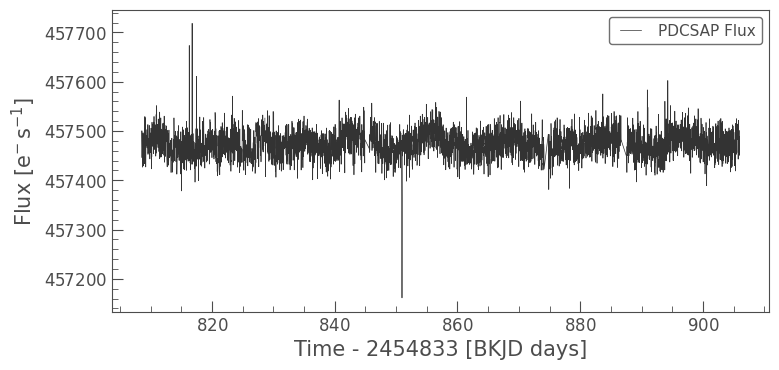

In [21]:
source.plot(label='PDCSAP Flux', normalize=False)

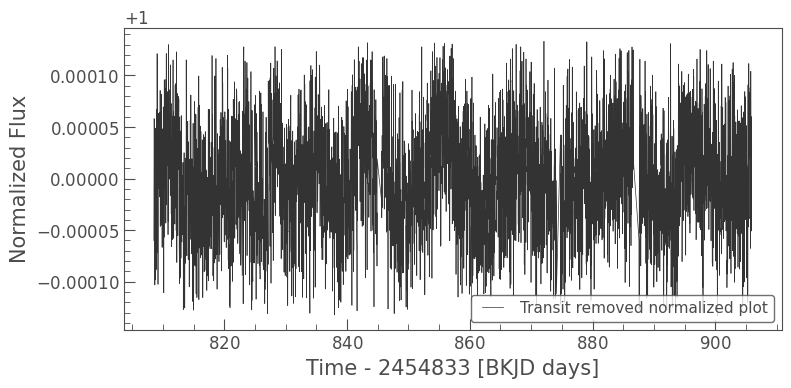

In [22]:
rem_out=source.remove_outliers(sigma = 2.5).normalize()
rem_out.plot(label='Transit removed normalized plot', normalize = True)

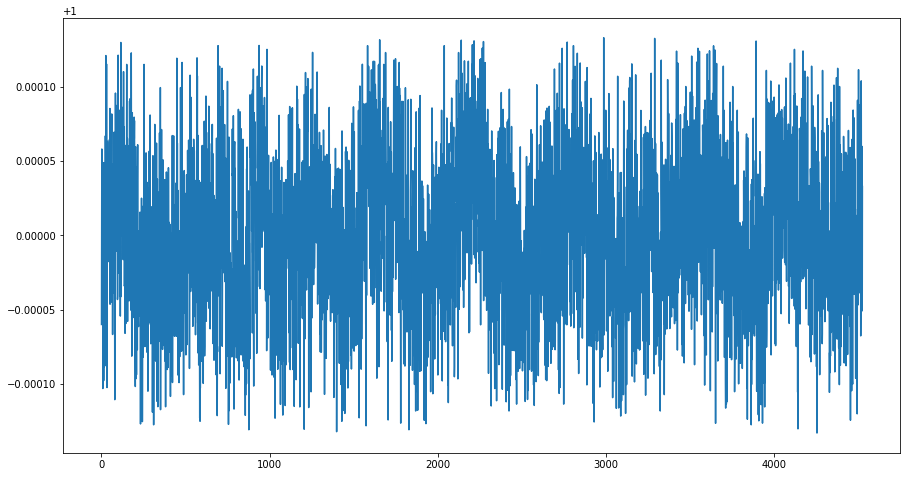

In [23]:
flux = rem_out.flux.value
time = rem_out.time.value
plt.figure(figsize=(15,8))
plt.plot(flux)

In [24]:
smoothed_signal = convolve(flux, Box1DKernel(16))

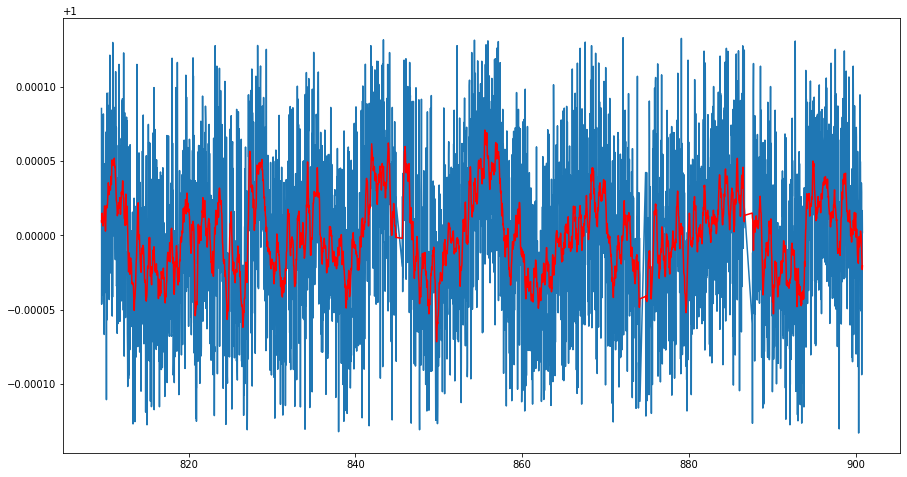

In [25]:
index = 50
ind = 250
plt.plot(time[index:-ind],flux[index:-ind])
plt.plot(time[index:-ind], smoothed_signal[index:-ind],color='red')

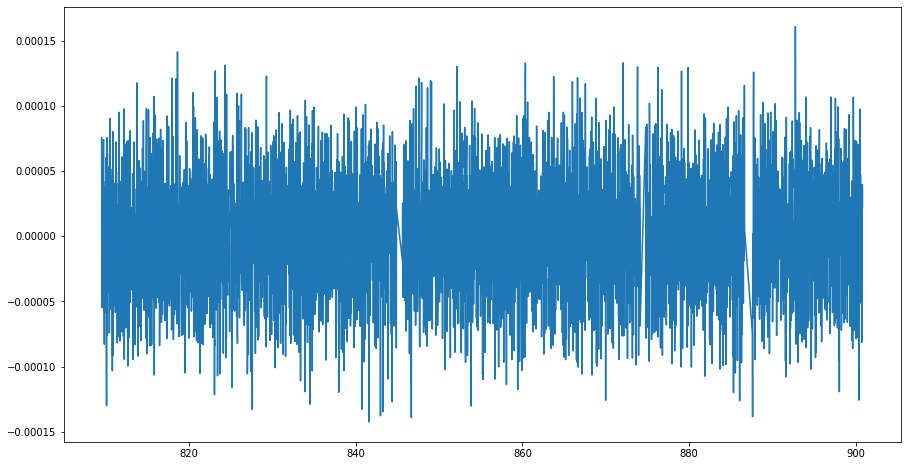

In [26]:
flkr=flux[index:-ind]-smoothed_signal[index:-ind]
plt.figure(figsize=(15,8))
plt.plot(time[index:-ind],flkr)

In [27]:
np.sqrt(np.mean(flkr**2))/1e-3

0.04668186011258513